In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import knor
from tqdm import tqdm
from week3 import *

In [35]:
def get_stuff(d, n=100, num_max_iter = 100):
    data0, data1 = gen_d_dim_data(d, n)
    data = np.concatenate((data0,data1), axis=0)
    
    
    classifier_em = KMeans(n_clusters=2, init='random', n_init=1, max_iter=num_max_iter)
    time0 = time.time()
    classifier_em.fit(data)
    time1 = time.time()
    dur_em = time1-time0
    
    klabels = classifier_em.predict(data)
    if np.sum(klabels[:50]) > 25:
        klabels = 1-klabels
    klabels_0 = data[klabels==0]
    klabels_1 = data[klabels==1]
    half = len(data)//2
    dlabels = np.concatenate(([0]*half,[1]*(len(data)-half)),axis=0)
    err_em = np.sum(((dlabels!=klabels)))/len(data)
    num_iter_em = classifier_em.n_iter_+1
    
    dur_init=0
    num_init=0
    while dur_init<dur_em:
        num_init += 10
        classifier_init = KMeans(n_clusters=2, init='k-means++', n_init=num_init, max_iter=n)
        time0 = time.time()
        classifier_init.fit(data)
        time1 = time.time()
        dur_init = time1-time0

    klabels = classifier_init.predict(data)
    if np.sum(klabels[:50]) > 25:
        klabels = 1-klabels
    klabels_0 = data[klabels==0]
    klabels_1 = data[klabels==1]
    half = len(data)//2
    dlabels = np.concatenate(([0]*half,[1]*(len(data)-half)),axis=0)
    err_init = np.sum(((dlabels!=klabels)))/len(data)
    num_iter_init = classifier_init.n_iter_+1

    
    return dur_init, dur_em, num_iter_init, num_iter_em, err_init, err_em, num_init

In [36]:
dur_inits = []
dur_ems = []
num_iter_inits = []
num_iter_ems = []
num_inits = []
err_inits = []
err_ems = []
x = [int(i) for i in np.linspace(1,101,10)]
#for i in tqdm(range(1,20)):
for i in tqdm(x):
    m_dur_inits = []
    m_dur_ems = []
    m_num_iter_inits = []
    m_num_iter_ems = []
    m_num_inits = []
    m_err_inits = []
    m_err_ems = []
    for _ in range(1000):
        dur_init, dur_em, num_iter_init, num_iter_em, err_init, err_em, num_init = get_stuff(i,n=1)
        m_dur_inits.append(dur_init)
        m_dur_ems.append(dur_em)
        m_num_iter_inits.append(num_iter_init)
        m_num_iter_ems.append(num_iter_em)
        m_err_inits.append(err_init)
        m_err_ems.append(err_em)
        m_num_inits.append(num_init)
    dur_inits.append((np.mean(m_dur_inits),np.std(m_dur_inits)))
    dur_ems.append((np.mean(m_dur_ems),np.std(m_dur_ems)))
    num_iter_inits.append((np.mean(m_num_iter_inits),np.std(m_num_iter_inits)))
    num_iter_ems.append((np.mean(m_num_iter_ems),np.std(m_num_iter_ems)))
    err_inits.append((np.mean(m_err_inits),np.std(m_err_inits)))
    err_ems.append((np.mean(m_err_ems),np.std(m_err_ems)))
    num_inits.append((np.mean(m_num_inits),np.std(m_num_inits)))

dur_inits = [list(t) for t in zip(*dur_inits)]
dur_ems = [list(t) for t in zip(*dur_ems)]
num_iter_inits = [list(t) for t in zip(*num_iter_inits)]
num_iter_ems = [list(t) for t in zip(*num_iter_ems)]
err_inits = [list(t) for t in zip(*err_inits)]
err_ems = [list(t) for t in zip(*err_ems)]
num_inits = [list(t) for t in zip(*num_inits)]

100%|██████████| 10/10 [01:11<00:00,  7.10s/it]


In [37]:
def rem_8(arr):
    return np.concatenate((arr[:8],arr[9:]))

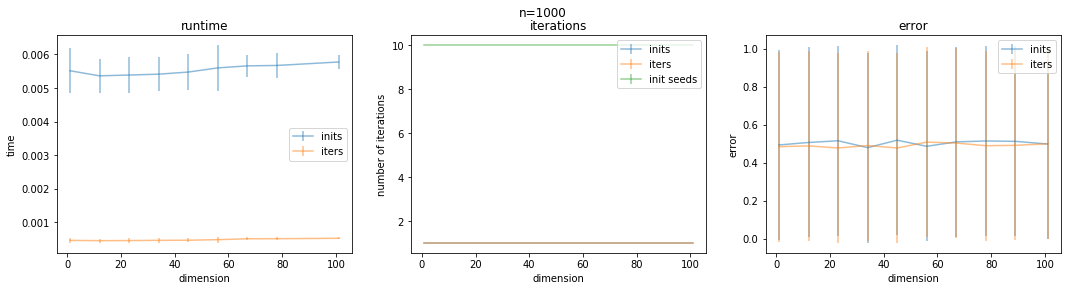

In [38]:
plt.figure(figsize=(18,4))
plt.suptitle('n=1000')
plt.subplot(131)
#plt.errorbar(range(1,20), dur_inits[0], yerr=dur_inits[1], alpha=0.5, label='inits')
plt.errorbar(rem_8(x), rem_8(dur_inits[0]), yerr=rem_8(dur_inits[1]), alpha=0.5, label='inits')
plt.errorbar(rem_8(x), rem_8(dur_ems[0]), yerr=rem_8(dur_ems[1]), alpha=0.5, label='iters')
plt.xlabel('dimension')
plt.ylabel('time')
plt.title('runtime')
plt.legend(loc='best')

plt.subplot(132)
plt.errorbar(x, num_iter_inits[0], yerr=num_iter_inits[1], alpha=0.5, label='inits')
plt.errorbar(x, num_iter_ems[0], yerr=num_iter_ems[1], alpha=0.5, label='iters')
plt.errorbar(x, num_inits[0], yerr=num_inits[1], alpha=0.5, label='init seeds')
plt.xlabel('dimension')
plt.ylabel('number of iterations')
plt.title('iterations')
plt.legend(loc='upper right')

plt.subplot(133)
plt.errorbar(x, err_inits[0], yerr=err_inits[1], alpha=0.5, label='inits')
plt.errorbar(x, err_ems[0], yerr=err_ems[1], alpha=0.5, label='iters')
plt.xlabel('dimension')
plt.ylabel('error')
plt.title('error')
plt.legend(loc='best')
plt.show()